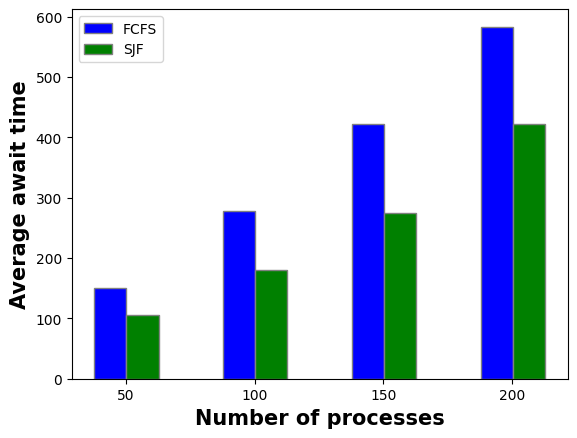

In [6]:
import numpy, os
from matplotlib import pyplot as plt
from fcfs_sjf_simulation import fcfs,sjf,create_processes
from process_generator import process_generator

number_of_processes = [50,100,150,200]

fcfs_awaits = []
sjf_awaits = []

file_path = os.path.abspath('')
results_file_path = os.path.join(file_path,'FCFS_SJF_results_raw.txt')
if os.path.exists(results_file_path):
    f = open('FCFS_SJF_results_raw.txt','r+')
    f.truncate(0)
    f.close()

for i in number_of_processes:
    process_generator(10,0,i)
    process_data = numpy.genfromtxt('fcfs_sjf_simulation_input.txt',delimiter=';')
    fcfs_result = round(fcfs(create_processes(process_data)),2)
    sjf_result = round(sjf(create_processes(process_data)),2)
    with open('FCFS_SJF_results_raw.txt','a') as write_file:
        write_file.write(f'{fcfs_result}:{sjf_result}')
        write_file.write('\n')
    fcfs_awaits.append(fcfs_result)
    sjf_awaits.append(sjf_result)

barWidth = 0.25

br1 = numpy.arange(len(fcfs_awaits)) 
br2 = [x + barWidth for x in br1] 
plt.bar(br1, fcfs_awaits, color ='b', width = barWidth, 
        edgecolor ='grey', label ='FCFS') 
plt.bar(br2, sjf_awaits, color ='g', width = barWidth, 
        edgecolor ='grey', label ='SJF') 
 
plt.xlabel('Number of processes', fontweight ='bold', fontsize = 15) 
plt.ylabel('Average await time', fontweight ='bold', fontsize = 15) 
plt.xticks([r + 0.12 for r in range(len(fcfs_awaits))], 
        number_of_processes)
 
plt.legend()
plt.show() 